# PyOR: A Versatile Magnetic Resonance Simulator for Learning and  Teaching
## Author: Vineeth Thalakottoor
## Global NMR Discussion Meeting​ September 9th, 2025

In [1]:
# Define the source path
SourcePath = '/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_V1/PyOR_Combined/PyOR/Source_Doc'

# Add source path
import sys
import time
sys.path.append(SourcePath)
%matplotlib ipympl

# Import PyOR package
from PyOR_QuantumSystem import QuantumSystem as QunS
from PyOR_Hamiltonian import Hamiltonian
from PyOR_DensityMatrix import DensityMatrix
from PyOR_QuantumObject import QunObj
from PyOR_HardPulse import HardPulse
from PyOR_Basis import Basis
from PyOR_Evolution import Evolutions
from PyOR_Plotting import Plotting
import PyOR_SignalProcessing as Spro

In [2]:
# Define the spin system
Spin_list = {"A" : "H1", "B" : "H1"}
QS = QunS(Spin_list,PrintDefault=False)

# initialize the system
QS.Initialize()

In [3]:
# "X" spin operator, Particle A
QS.Ax.matrix

Matrix([
[  0,   0, 0.5,   0],
[  0,   0,   0, 0.5],
[0.5,   0,   0,   0],
[  0, 0.5,   0,   0]])

In [4]:
# "X" spin operator, Particle B
QS.Bx.matrix

Matrix([
[  0, 0.5,   0,   0],
[0.5,   0,   0,   0],
[  0,   0,   0, 0.5],
[  0,   0, 0.5,   0]])

In [5]:
# "Y" spin operator, Particle A
QS.Ay.matrix

Matrix([
[    0,     0, -0.5*I,      0],
[    0,     0,      0, -0.5*I],
[0.5*I,     0,      0,      0],
[    0, 0.5*I,      0,      0]])

In [6]:
# "Y" spin operator, Particle B
QS.By.matrix

Matrix([
[    0, -0.5*I,     0,      0],
[0.5*I,      0,     0,      0],
[    0,      0,     0, -0.5*I],
[    0,      0, 0.5*I,      0]])

In [7]:
# "Z" spin operator, Particle A
QS.Az.matrix

Matrix([
[0.5,   0,    0,    0],
[  0, 0.5,    0,    0],
[  0,   0, -0.5,    0],
[  0,   0,    0, -0.5]])

In [8]:
# "Z" spin operator, Particle B
QS.Bz.matrix

Matrix([
[0.5,    0,   0,    0],
[  0, -0.5,   0,    0],
[  0,    0, 0.5,    0],
[  0,    0,   0, -0.5]])

In [9]:
# "+"" spin operator, Particle A
QS.Ap.matrix

Matrix([
[0, 0, 1.0,   0],
[0, 0,   0, 1.0],
[0, 0,   0,   0],
[0, 0,   0,   0]])

In [10]:
# "+"" spin operator, Particle B
QS.Bp.matrix

Matrix([
[0, 1.0, 0,   0],
[0,   0, 0,   0],
[0,   0, 0, 1.0],
[0,   0, 0,   0]])

In [11]:
# "-"" spin operator, Particle A
QS.Am.matrix

Matrix([
[  0,   0, 0, 0],
[  0,   0, 0, 0],
[1.0,   0, 0, 0],
[  0, 1.0, 0, 0]])

In [12]:
# "-"" spin operator, Particle B
QS.Bm.matrix

Matrix([
[  0, 0,   0, 0],
[1.0, 0,   0, 0],
[  0, 0,   0, 0],
[  0, 0, 1.0, 0]])

In [13]:
# "X" spin operator sub-system, Particle A
QS.Ax_sub.matrix

Matrix([
[  0, 0.5],
[0.5,   0]])

In [14]:
# "X" spin operator sub-system, Particle B
QS.Bx_sub.matrix

Matrix([
[  0, 0.5],
[0.5,   0]])

In [15]:
# "Y" spin operator sub-system, Particle A
QS.Ay_sub.matrix

Matrix([
[    0, -0.5*I],
[0.5*I,      0]])

In [16]:
# "Y" spin operator sub-system, Particle B
QS.By_sub.matrix

Matrix([
[    0, -0.5*I],
[0.5*I,      0]])

In [17]:
# "Z" spin operator sub-system, Particle A
QS.Az_sub.matrix

Matrix([
[0.5,    0],
[  0, -0.5]])

In [18]:
# "Z" spin operator sub-system, Particle B
QS.Bz_sub.matrix

Matrix([
[0.5,    0],
[  0, -0.5]])

In [19]:
# "+" spin operator sub-system, Particle A
QS.Ap_sub.matrix

Matrix([
[0, 1.0],
[0,   0]])

In [20]:
# "+" spin operator sub-system, Particle B
QS.Bp_sub.matrix

Matrix([
[0, 1.0],
[0,   0]])

In [21]:
# "-" spin operator sub-system, Particle A
QS.Am_sub.matrix

Matrix([
[  0, 0],
[1.0, 0]])

In [22]:
# "-" spin operator sub-system, Particle B
QS.Bm_sub.matrix

Matrix([
[  0, 0],
[1.0, 0]])

## Set parameters

In [23]:
# Master Equation
QS.PropagationSpace = "Hilbert"
QS.MasterEquation = "Redfield"

# Operator Basis
QS.Basis_SpinOperators_Hilbert = "Zeeman"

# B0 Field in Tesla, Static Magnetic field (B0) along Z
QS.B0 = 9.4

# Offset Frequency in rotating frame (Hz)
QS.OFFSET["A"] = 10.0
QS.OFFSET["B"] = 50.0

# Define J coupling between Spins 
QS.JcoupleValue("A","B",5.0)

# Define initial and final Spin Temperature
QS.I_spintemp["A"] = 300.0
QS.I_spintemp["B"] = 300.0
QS.F_spintemp["A"] = 300.0
QS.F_spintemp["B"] = 300.0

# Relaxation Process
QS.Rprocess = "Phenomenological"
QS.R1 = 1
QS.R2 = 2

QS.Update()

Larmor Frequency in MHz:  [-400.22802765 -400.22806765]


## Generate Hamiltonians

In [24]:
# generate Larmor Frequencies
QS.print_Larmor = True
Ham = Hamiltonian(QS)

Larmor Frequency in MHz:  [-400.22802765 -400.22806765]


In [25]:
Hz = Ham.Zeeman_RotFrame()
Hz.Inverse2PI().Round(2).matrix

Matrix([
[-30.0,    0,     0,    0],
[    0, 20.0,     0,    0],
[    0,    0, -20.0,    0],
[    0,    0,     0, 30.0]])

In [26]:
# J coupling Hamiltonian
Hj = Ham.Jcoupling()
Hj.Inverse2PI().Round(2).matrix

Matrix([
[1.25,     0,     0,    0],
[   0, -1.25,   2.5,    0],
[   0,   2.5, -1.25,    0],
[   0,     0,     0, 1.25]])

## Initialize density matrix

In [27]:
DM = DensityMatrix(QS,Ham)

Thermal_DensMatrix = False

if Thermal_DensMatrix:    
    # High Temperature
    HT_approx = False
    
    # Initial Density Matrix
    rho_in = DM.EqulibriumDensityMatrix(QS.Ispintemp,HT_approx)
    
    # Equlibrium Density Matrix
    rhoeq = DM.EqulibriumDensityMatrix(QS.Fspintemp,HT_approx)
else:
    rho_in = QS.Az + QS.Bz
    rhoeq = QS.Az + QS.Bz

In [28]:
# Initial Density Matrix
rho_in.matrix

Matrix([
[1.0, 0, 0,    0],
[  0, 0, 0,    0],
[  0, 0, 0,    0],
[  0, 0, 0, -1.0]])

In [29]:
# Final Density Matrix
rhoeq.matrix

Matrix([
[1.0, 0, 0,    0],
[  0, 0, 0,    0],
[  0, 0, 0,    0],
[  0, 0, 0, -1.0]])

## Product Operator Basis (PMZ / Shift Z basis)

In [30]:
# Product Operator Basis (PMZ / Shift Z basis) 
BS = Basis(QS)

sort = 'negative to positive'
Index = False
Normal = True
Basis_PMZ, coh_PMZ, dic_PMZ = BS.ProductOperators_SpinHalf_PMZ(sort,Index,Normal)

In [31]:
# Coherence order
coh_PMZ

[-2, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2]

In [32]:
# Dictionary
print(dic_PMZ)

['Im1 Im2 ', 'Im1 Iz2 ', 'Im1 Id2 ', 'Iz1 Im2 ', 'Id1 Im2 ', 'Im1 Ip2 ', 'Iz1 Iz2 ', 'Iz1 Id2 ', 'Id1 Iz2 ', 'Id1 Id2 ', 'Ip1 Im2 ', 'Iz1 Ip2 ', 'Id1 Ip2 ', 'Ip1 Iz2 ', 'Ip1 Id2 ', 'Ip1 Ip2 ']


In [33]:
Basis_PMZ[0].matrix

Matrix([
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[1.0, 0, 0, 0]])

In [34]:
Basis_PMZ_String = BS.String_to_Matrix(dic_PMZ, Basis_PMZ)

['Im1Im2', 'Im1Iz2', 'Im1', 'Iz1Im2', 'Im2', 'Im1Ip2', 'Iz1Iz2', 'Iz1', 'Iz2', '', 'Ip1Im2', 'Iz1Ip2', 'Ip2', 'Ip1Iz2', 'Ip1', 'Ip1Ip2']


In [35]:
Basis_PMZ_String['Im1Im2'].matrix

Matrix([
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[1.0, 0, 0, 0]])

In [36]:
# Decomposition of density matrix in PMZ basis
DM.DensityMatrix_Components(rho_in,Basis_PMZ,dic_PMZ)

Density Matrix = 1.0 Iz1 Id2  + 1.0 Id1 Iz2 


## Hard Pulse

In [37]:
HardP = HardPulse(QS)

flip_angle1 = 90.0   # Flip angle Spin 1
flip_angle2 = 90.0 # Flip angle Spin 2

rho = HardP.Rotate_Pulse(rho_in,flip_angle1,QS.Ay)
rho = HardP.Rotate_Pulse(rho,flip_angle2,QS.By) 
rho.Tolarence(1.0e-5).matrix

Matrix([
[  0, 0.5, 0.5,   0],
[0.5,   0,   0, 0.5],
[0.5,   0,   0, 0.5],
[  0, 0.5, 0.5,   0]])

In [38]:
DM.DensityMatrix_Components(rho,Basis_PMZ,dic_PMZ)

Density Matrix = 0.70711 Im1 Id2  + 0.70711 Id1 Im2  + -0.70711 Id1 Ip2  + -0.70711 Ip1 Id2 


## Evolution

In [39]:
QS.AcqDT = 0.0001
QS.AcqAQ = 5.0
QS.OdeMethod = 'DOP853'
QS.PropagationMethod = "ODE Solver"

EVol = Evolutions(QS,Ham)

start_time = time.time()
t, rho_t = EVol.Evolution(rho,rhoeq,Hz+Hj)
end_time = time.time()
timetaken = end_time - start_time
print("Total time = %s seconds " % (timetaken))

Larmor Frequency in MHz:  [-400.22802765 -400.22806765]
Total time = 2.377058506011963 seconds 


## Expectation

In [40]:
det_Mt = QS.Ap + QS.Bp
det_Z = QS.Az + QS.Bz

t, Mt = EVol.Expectation(rho_t,det_Mt)
t, Mz = EVol.Expectation(rho_t,det_Z)

## Fourier Transform

In [41]:
freq, spectrum = Spro.FourierTransform(Mt,QS.AcqFS,5)

In [42]:
plot = Plotting(QS)

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.widgets.SpanSelector at 0x7fa73057e9c0>)

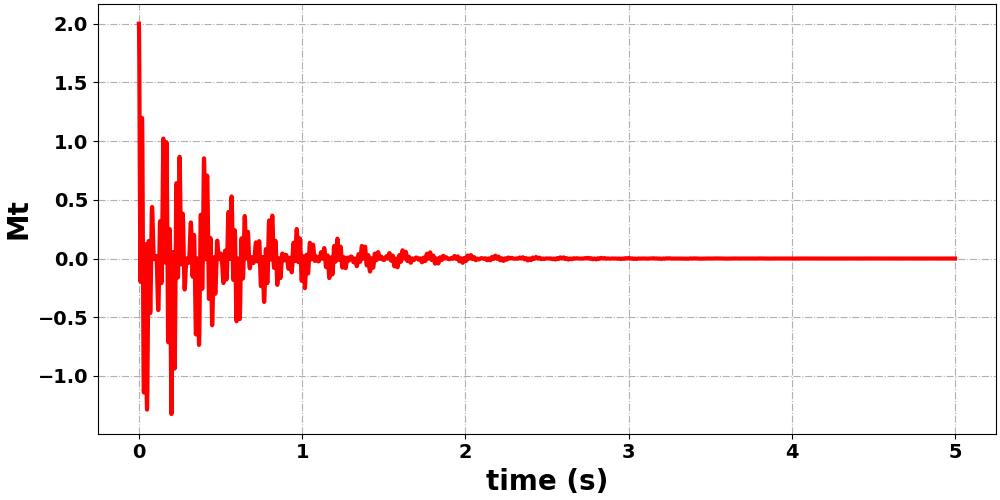

In [43]:
plot.PlotFigureSize = (10,5)
plot.PlotFontSize = 20
plot.Plotting_SpanSelector(t,Mt,"time (s)","Mt","red") 

(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.widgets.SpanSelector at 0x7fa72e513320>)

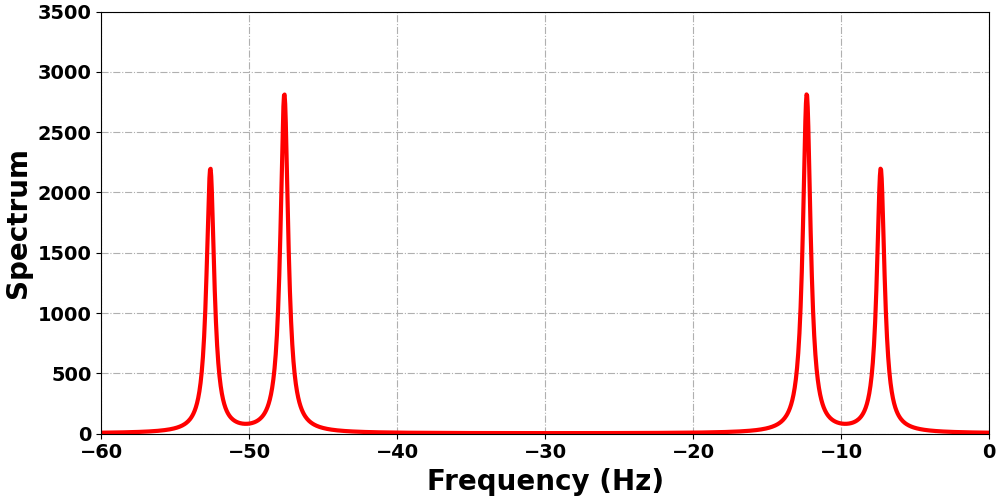

In [44]:
plot.PlotFigureSize = (10,5)
plot.PlotFontSize = 20
plot.PlotXlimt= (-60,0)
plot.PlotYlimt= (0,3500)
plot.Plotting_SpanSelector(freq,spectrum,"Frequency (Hz)","Spectrum","red")